# CLEANING AND DESCRIPTIVE DATA ANALYSIS
---

In [12]:
# LIBRARIES
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import utils as eda

# URL
total_data = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/data-preprocessing-project-tutorial/main/AB_NYC_2019.csv')

<small>Note: The 'utils.py' file contains **specific functions** according to the standards of Exploratory Data Analysis (EDA) and Descriptive Data Analysis (DDA). The functions with the prefix 'eda' are described in the 'utils.py' doc. <small>

### 1. General information about the dataset, including its shape, column names, presence of null entries, and data types:

In [13]:
# general info and shape
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  last_review                     

### 2. Information about measures of central tendency and dispersion:

In [14]:
# General description and data values 
total_data.describe().T

,count,mean,std,min,25%,50%,75%,max
id,48895.0,1.901714e+07,1.098311e+07,2539.00000,9.471945e+06,1.967728e+07,2.915218e+07,3.648724e+07
host_id,48895.0,6.762001e+07,7.861097e+07,2438.00000,7.822033e+06,3.079382e+07,1.074344e+08,2.743213e+08
latitude,48895.0,4.072895e+01,5.453008e-02,40.49979,4.069010e+01,4.072307e+01,4.076311e+01,4.091306e+01
longitude,48895.0,-7.395217e+01,4.615674e-02,-74.24442,-7.398307e+01,-7.395568e+01,-7.393627e+01,-7.371299e+01
price,48895.0,1.527207e+02,2.401542e+02,0.00000,6.900000e+01,1.060000e+02,1.750000e+02,1.000000e+04
minimum_nights,48895.0,7.029962e+00,2.051055e+01,1.00000,1.000000e+00,3.000000e+00,5.000000e+00,1.250000e+03
number_of_reviews,48895.0,2.327447e+01,4.455058e+01,0.00000,1.000000e+00,5.000000e+00,2.400000e+01,6.290000e+02
reviews_per_month,38843.0,1.373221e+00,1.680442e+00,0.01000,1.900000e-01,7.200000e-01,2.020000e+00,5.850000e+01
calculated_host_listings_count,48895.0,7.143982e+00,3.295252e+01,1.00000,1.000000e+00,1.000000e+00,2.000000e+00,3.270000e+02
availability_365,48895.0,1.127813e+02,1.316223e+02,0.00000,0.000000e+00,4.500000e+01,2.270000e+02,3.650000e+02


### 3. Check for duplicate values:
_Note: for this step, both 'id' and 'host_id' were dropped in order to look for duplicate entries_

In [15]:
# Duplicates
total_data.drop(["id","host_id"],axis=1).duplicated().sum()


0

### 4. Drop irrelevant columns for price calculation:

In [16]:
total_data = total_data.drop(["id", "name", "host_id", "host_name", "neighbourhood", 
                                    "number_of_reviews", "last_review", "reviews_per_month",
                                    "calculated_host_listings_count"], axis= 1)

### 5. Remove target variable entries with a value of 0:

In [17]:
total_data = total_data[total_data['price'] != 0]

### 6. Review of the dataset with the applied modifications:

In [18]:
total_data.head()

,neighbourhood_group,latitude,longitude,room_type,price,minimum_nights,availability_365
0,Brooklyn,40.64749,-73.97237,Private room,149,1,365
1,Manhattan,40.75362,-73.98377,Entire home/apt,225,1,355
2,Manhattan,40.80902,-73.94190,Private room,150,3,365
3,Brooklyn,40.68514,-73.95976,Entire home/apt,89,1,194
4,Manhattan,40.79851,-73.94399,Entire home/apt,80,10,0


### 7. Histogram of data distribution for each numerical variable:

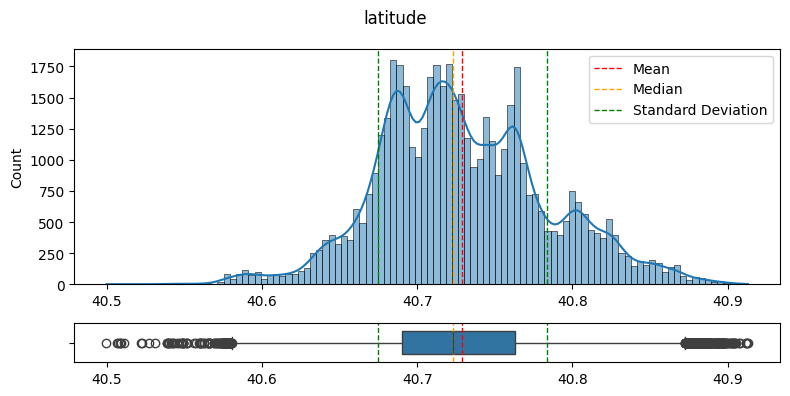

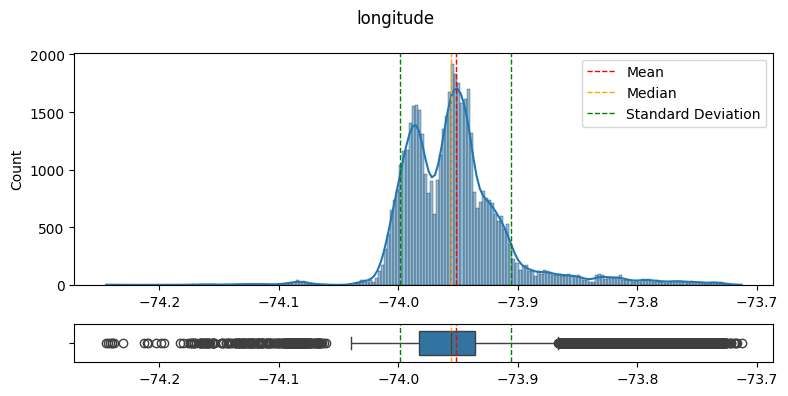

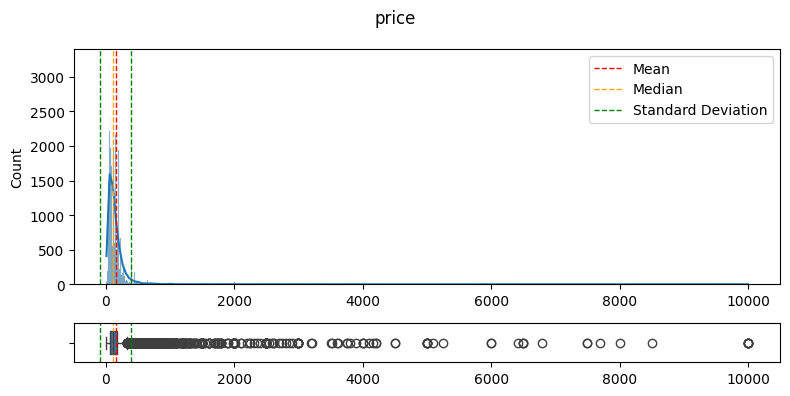

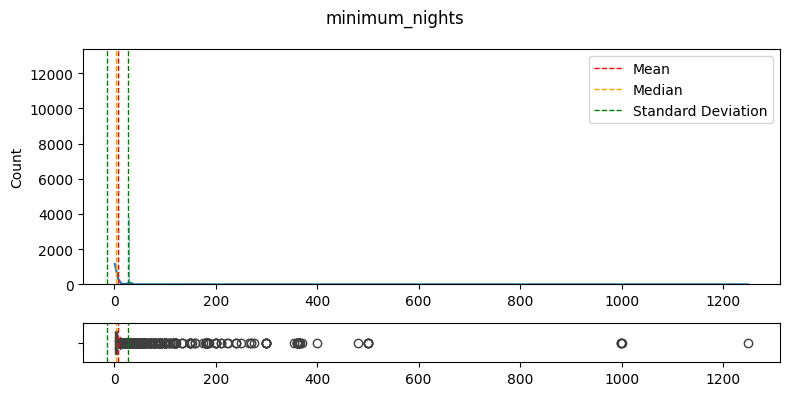

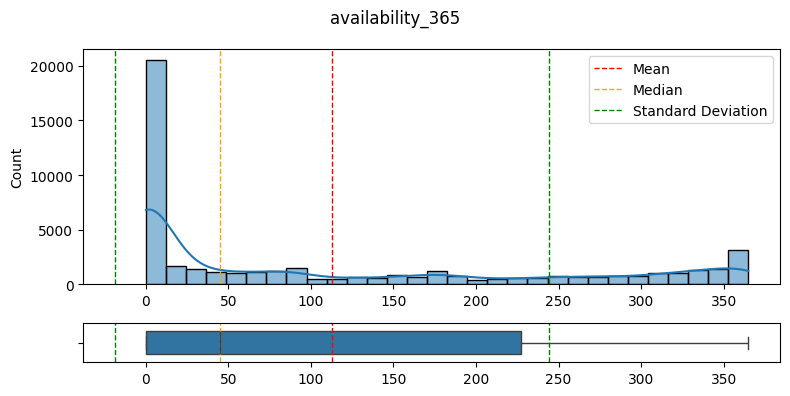

In [19]:
# Plot numerical variables to see values distribution (mean, median, std, outliers)
eda.plot_numerical_data(total_data)

The numerical graphs show the following results: 

- The 'latitude' and 'longitude' values are correct.
- The 'price' target variable predominantly retains entries between 1 and 1,000, and reachs values up to 10,000.
- The -minimum_nights- distribution exhibits irregularities, notably with unusually high entries (a minimum of 100 nights).
- The 'availability_365' field contains several entries with '0', suggesting a potential error (indicating that a published apartment may not be available).

### 8. Histogram of data distribution for each categorical variable:

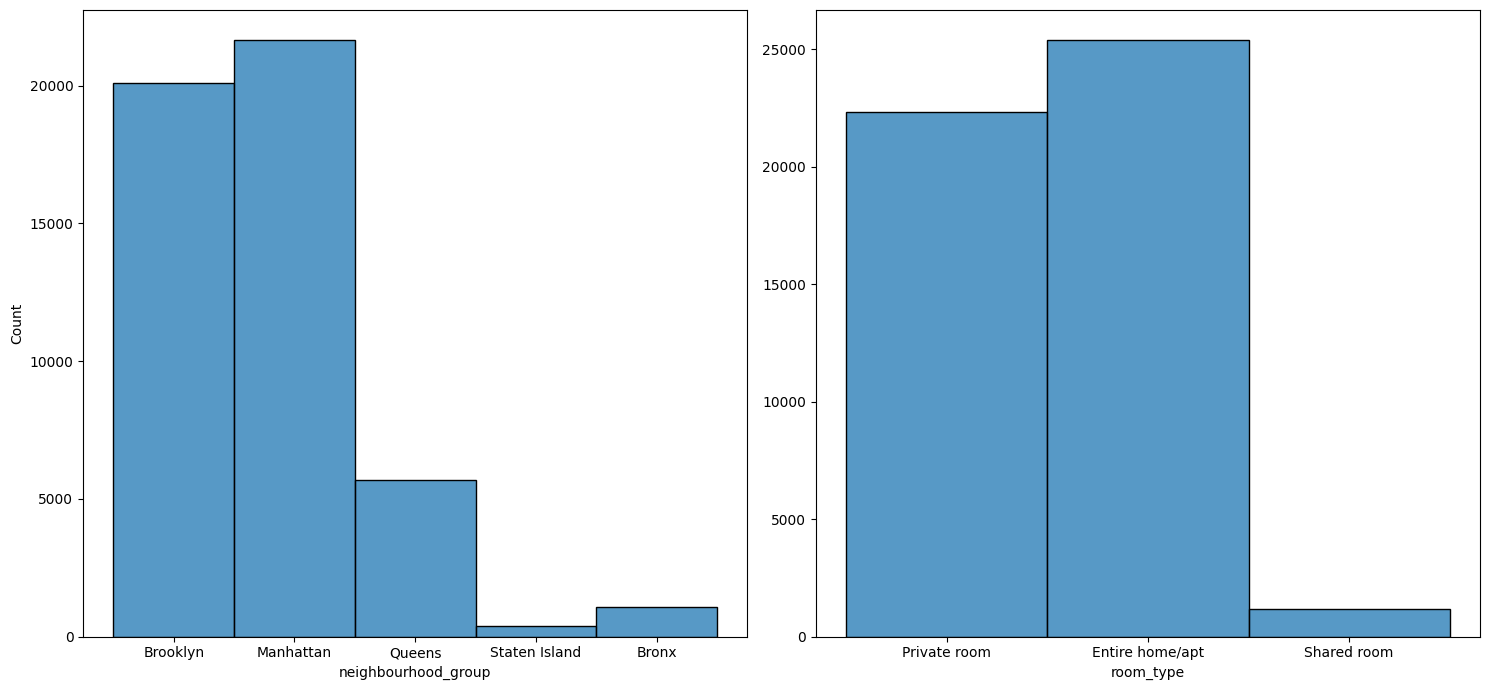

In [20]:
fig, axis = plt.subplots(1, 2, figsize = (15, 7))
# Create a multiple histogram
sns.histplot(ax = axis[0], data = total_data, x = "neighbourhood_group")
sns.histplot(ax = axis[1], data = total_data, x = "room_type").set(ylabel = None)
# Adjust the layout
plt.tight_layout()
plt.show()

The categorical graphs show the following results: 

- The majority of accommodations are located in Brooklyn and Manhattan. Queens constitutes 0.25 of the total records, while Bronx and Staten Island have minimal representation in the listings.
- The predominant accommodation type is entire homes, accounting for 25,000 entries. Following closely are private rooms with 23,000 entries, while shared rooms make up a minimal portion of the listings.

Finally, the clean data will be stored for the next step of analysis

In [21]:
total_data.to_csv('eda_total_data.csv',index=False)

---
## DESCRIPTIVE DATA ANALYSIS CONCLUSIONS

**Dataset Size:**
The dataset comprises 48,895 entries and a total of 16 columns, including the target variable and predictors.

**Data Type:**
There are 9 numeric predictors and 6 categorical predictors. The target variable is numeric, indicating a numerical continious price.

**Missing Values:**
Two variables, 'last_review' and 'number_of_reviews,' exhibit 10,000 null values. Apart from these, the dataset is complete, with almost no missing values observed across other entries.

**Duplicates:**
No duplicate entries have been identified in the dataset. Each row is unique.

**Dropped Columns:**
Several columns have been dropped from the dataset for being deemed irrelevant or unnecessary. These columns include "id," "name," "host_id," "host_name," "neighbourhood," "number_of_reviews," "last_reviews," "reviews_per_month,` and "calculated_host_listings_count."

**Dropped Target Registries:**
Entries with a target variable value of 0 have been removed, totaling 11 entries.

**Data Distribution:**
Graphs reveal accurate 'latitude' and 'longitude' values, while the 'price' variable is primarily distributed between 1 and 1,000, with occasional peaks reaching 10,000. However, the 'minimum_nights' distribution displays irregularities, particularly with extremely high entries (minimum of 100 nights). Additionally, the 'availability_365' field includes instances with '0', indicating a potential error, possibly signifying that a published apartment may not be available.

**Outliers:**
The dataset contains entries with '0' values and statistically high values. However, it's crucial to consider that these values may not necessarily be incorrect and require additional investigation.

